# Covid Cases in London over time

I am looking to confirm there is no correlation between covid deaths in London and underlying socio economic and demographic circumstances in London. Particular correlations we are looking for are, total covid deaths versus:
- age
- health
- income
- living conditions
- ethnicity

We will look to use scatter plots for each relationship in turn to look for patterns and then produce a correlation heatmap to get a numerical measure to confirm or negate our views based on the scatter plots.

We will then look at how covid deaths accumulated by week in each borough to see if there is any correlation across time between boroughs. 

We will then finish by creating a waffle chart showing progression of covid cases by week in each 10km^2 grid location across London to see if there a proximity relationship emerges

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import altair as alt
import seaborn as sns
import numpy as np

In [2]:
uk_covid_data = pd.read_excel("lahbtablesweek01to5320201.xlsx", sheet_name='Registrations - All data', skiprows=3)

In [3]:
uk_covid_data = uk_covid_data[uk_covid_data['Cause of death']=='COVID 19']
print(uk_covid_data.count())
uk_covid_data.head()

Area code           109074
Geography type      109074
Area name           109074
Cause of death      109074
Week number         109074
Place of death      109074
Number of deaths    109074
dtype: int64


,Area code,Geography type,Area name,Cause of death,Week number,Place of death,Number of deaths
6,E06000001,Local Authority,Hartlepool,COVID 19,1,Care home,0
7,E06000001,Local Authority,Hartlepool,COVID 19,1,Elsewhere,0
8,E06000001,Local Authority,Hartlepool,COVID 19,1,Home,0
9,E06000001,Local Authority,Hartlepool,COVID 19,1,Hospice,0
10,E06000001,Local Authority,Hartlepool,COVID 19,1,Hospital,0


In [4]:
london_covid = uk_covid_data[uk_covid_data['Area code'].str.contains('E09')]
print(london_covid.count())
london_covid.head()

Area code           10494
Geography type      10494
Area name           10494
Cause of death      10494
Week number         10494
Place of death      10494
Number of deaths    10494
dtype: int64


,Area code,Geography type,Area name,Cause of death,Week number,Place of death,Number of deaths
3378,E09000001,Local Authority,City of London,COVID 19,1,Care home,0
3379,E09000001,Local Authority,City of London,COVID 19,1,Elsewhere,0
3380,E09000001,Local Authority,City of London,COVID 19,1,Home,0
3381,E09000001,Local Authority,City of London,COVID 19,1,Hospice,0
3382,E09000001,Local Authority,City of London,COVID 19,1,Hospital,0


In [5]:
london_covid_agg = london_covid.groupby(['Area code', 'Area name ', 'Week number']).sum().reset_index()
london_covid_agg.rename(columns = {'Area code':'code'}, inplace = True)
london_covid_agg.rename(columns = {'Area name ':'name'}, inplace = True)
london_covid_agg.rename(columns = {'Week number':'week'}, inplace = True)
london_covid_agg.rename(columns = {'Number of deaths':'count'}, inplace = True)

print(london_covid_agg.count())

london_covid_agg.head()

code     1749
name     1749
week     1749
count    1749
dtype: int64


,code,name,week,count
0,E09000001,City of London,1,0
1,E09000001,City of London,2,0
2,E09000001,City of London,3,0
3,E09000001,City of London,4,0
4,E09000001,City of London,5,0


In [6]:
# now lets get income and other data
uk_deprivation_data = pd.read_excel("File_2_-_IoD2019_Domains_of_Deprivation.xlsx", sheet_name='IoD2019 Domains')
#print(uk_deprivation_data.count())

In [7]:
london_deprivation = uk_deprivation_data[uk_deprivation_data['Local Authority District code (2019)'].str.contains('E09')]
#print(london_deprivation.count())
london_deprivation.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),Employment Rank (where 1 is most deprived),Employment Decile (where 1 is most deprived 10% of LSOAs),"Education, Skills and Training Rank (where 1 is most deprived)","Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)",Health Deprivation and Disability Rank (where 1 is most deprived),Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs),Crime Rank (where 1 is most deprived),Crime Decile (where 1 is most deprived 10% of LSOAs),Barriers to Housing and Services Rank (where 1 is most deprived),Barriers to Housing and Services Decile (where 1 is most deprived 10% of LSOAs),Living Environment Rank (where 1 is most deprived),Living Environment Decile (where 1 is most deprived 10% of LSOAs)
0,E01000001,City of London 001A,E09000001,City of London,29199,9,32831,10,32742,10,32842,10,32113,10,32662,10,7319,3,7789,3
1,E01000002,City of London 001B,E09000001,City of London,30379,10,29901,10,31190,10,32832,10,29705,10,32789,10,11707,4,13070,4
2,E01000003,City of London 001C,E09000001,City of London,14915,5,18510,6,15103,5,26386,9,17600,6,29363,9,2157,1,4092,2
3,E01000005,City of London 001E,E09000001,City of London,8678,3,6029,2,7833,3,12370,4,17907,6,31059,10,2217,1,9397,3
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,14486,5,14023,5,21692,7,17511,6,21581,7,18848,6,1033,1,10629,4


In [8]:
london_deprivation_agg = london_deprivation.groupby(['Local Authority District code (2019)', 'Local Authority District name (2019)']).median().reset_index()
london_deprivation_agg.rename(columns = {'Local Authority District code (2019)':'code'}, inplace = True)
london_deprivation_agg.rename(columns = {'Local Authority District name (2019)':'name'}, inplace = True)
london_deprivation_agg.rename(columns = {'Income Rank (where 1 is most deprived)':'income_rank'}, inplace = True)
london_deprivation_agg.rename(columns = {'Employment Rank (where 1 is most deprived)':'employment_rank'}, inplace = True)
london_deprivation_agg.rename(columns = {'Education, Skills and Training Rank (where 1 is most deprived)':'education_rank'}, inplace = True)
london_deprivation_agg.rename(columns = {'Health Deprivation and Disability Rank (where 1 is most deprived)':'health_rank'}, inplace = True)
london_deprivation_agg.rename(columns = {'Living Environment Rank (where 1 is most deprived)':'living_env_rank'}, inplace = True)

london_deprivation_agg = london_deprivation_agg[['code', 'name', 'income_rank', 
                                                 'employment_rank', 'education_rank',
                                                'health_rank', 'living_env_rank']]

london_deprivation_agg.head()

,code,name,income_rank,employment_rank,education_rank,health_rank,living_env_rank
0,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5
1,E09000002,Barking and Dagenham,6888.5,9387.0,10212.5,12807.0,9698.0
2,E09000003,Barnet,17032.0,20563.0,27297.0,29450.0,13192.0
3,E09000004,Bexley,18572.0,21212.5,15888.0,25579.5,16200.0
4,E09000005,Brent,11786.0,15204.0,18687.0,23514.0,10075.0


In [9]:
london_combined = pd.merge(london_deprivation_agg, london_covid_agg, left_on='code', right_on='code', how = 'inner')
london_combined.drop(['name_y'], axis=1, inplace=True)
london_combined.rename(columns = {'name_x':'name'}, inplace = True)
london_combined.head()

,code,name,income_rank,employment_rank,education_rank,health_rank,living_env_rank,week,count
0,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,1,0
1,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,2,0
2,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,3,0
3,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,4,0
4,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,5,0


In [10]:
london_combined_agg = london_combined.groupby(['code', 
                                               'name',
                                               'income_rank',
                                               'employment_rank',
                                               'education_rank',
                                               'health_rank',
                                               'living_env_rank']).sum().reset_index()

london_combined_agg.rename(columns = {'count':'covid_deaths'}, inplace = True)
london_combined_agg.drop(['week'], axis=1, inplace=True)

london_combined_agg.head()

,code,name,income_rank,employment_rank,education_rank,health_rank,living_env_rank,covid_deaths
0,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,6
1,E09000002,Barking and Dagenham,6888.5,9387.0,10212.5,12807.0,9698.0,295
2,E09000003,Barnet,17032.0,20563.0,27297.0,29450.0,13192.0,560
3,E09000004,Bexley,18572.0,21212.5,15888.0,25579.5,16200.0,339
4,E09000005,Brent,11786.0,15204.0,18687.0,23514.0,10075.0,556


In [11]:
# now load and transform population estimates - I want london age 61-70, 71-80, 80_plus
# I also want to divide the covid deaths by the borough population to pro rata it, but also
# multiply by 100,000 to get a big number

# skip first four rows as just header information text
uk_by_age = pd.read_excel("other_data/ukmidyearestimates20192020ladcodes.xls", sheet_name='MYE2 - Males', skiprows=4)

uk_by_age = uk_by_age.dropna(how='all') # only drops a row when every column is NA

# Now check for NaN values
nan_values = uk_by_age[uk_by_age.isna().any(axis=1)]
print(nan_values)

# Row 427 is just description data so remove it
nan_values_index = uk_by_age[uk_by_age.isna().any(axis=1)].index
uk_by_age = uk_by_age.drop(nan_values_index)

london_by_age = uk_by_age[uk_by_age['Code'].str.contains('E09')]
london_by_age.head()

# I want to melt the data because the ages 0-90+ are in columns and I want them in rows - tidy data
col_names = london_by_age.columns.tolist()
col_names = col_names[4:95]

london_by_age = pd.melt(london_by_age, id_vars=['Code', 'Name', 'Geography1', 'All ages'], 
                        value_vars=col_names, var_name = 'Age', value_name='AgeTotal')

london_by_age.head()

                                                  Code Name Geography1  \
427  1. Further information, on how the different t...  NaN        NaN   

     All ages   0   1   2   3   4   5  ...  81  82  83  84  85  86  87  88  \
427       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN   

     89  90+  
427 NaN  NaN  

[1 rows x 95 columns]


,Code,Name,Geography1,All ages,Age,AgeTotal
0,E09000007,Camden,London Borough,135978.0,0,1310.0
1,E09000001,City of London,London Borough,5320.0,0,42.0
2,E09000012,Hackney,London Borough,140023.0,0,2173.0
3,E09000013,Hammersmith and Fulham,London Borough,90740.0,0,1126.0
4,E09000014,Haringey,London Borough,135883.0,0,1785.0


In [12]:
london_by_age.loc[london_by_age.Age == '90+', "Age"] = 90 # need to convert from 90+ to 90 so we can then conv to numeric

# now get groupings for ages 60-69, 70-79, 80+
london_by_age['Age'] = pd.to_numeric(london_by_age['Age'])
london_by_age['AgeTotal'] = pd.to_numeric(london_by_age['AgeTotal'])

london_60s = london_by_age.groupby(["Code","Name", "All ages"]).apply(lambda x: x['AgeTotal'][(london_by_age.Age > 59) & (london_by_age.Age < 70)].sum()/x['All ages'].mean()).reset_index()
london_60s.rename(columns = {0:'60s_proportion'}, inplace = True)

london_70s = london_by_age.groupby(["Code","Name", "All ages"]).apply(lambda x: x['AgeTotal'][(london_by_age.Age > 69) & (london_by_age.Age < 80)].sum()/x['All ages'].mean()).reset_index()
london_70s.rename(columns = {0:'70s_proportion'}, inplace = True)

london_80s = london_by_age.groupby(["Code","Name", "All ages"]).apply(lambda x: x['AgeTotal'][london_by_age.Age > 79].sum()/x['All ages'].mean()).reset_index()
london_80s.rename(columns = {0:'80s_proportion'}, inplace = True)
    
london_by_age_agg = pd.merge(london_60s, london_70s, left_on='Code', right_on='Code', how = 'inner')
london_by_age_agg = pd.merge(london_by_age_agg, london_80s, left_on='Code', right_on='Code', how = 'inner')
    
# now drop duplicate fields and rename Name_x to Name
london_by_age_agg.drop(['Name_y'], axis=1, inplace=True)
london_by_age_agg.drop(['Name'], axis=1, inplace=True)
london_by_age_agg.drop(['All ages_y'], axis=1, inplace=True)
london_by_age_agg.drop(['All ages'], axis=1, inplace=True)
london_by_age_agg.rename(columns = {'Name_x':'Name'}, inplace = True)
london_by_age_agg.rename(columns = {'All ages_x':'all_ages'}, inplace = True)

london_by_age_agg.head()


,Code,Name,all_ages,60s_proportion,70s_proportion,80s_proportion
0,E09000001,City of London,5320.0,0.104699,0.068045,0.038722
1,E09000002,Barking and Dagenham,105877.0,0.065076,0.034720,0.019778
2,E09000003,Barnet,196542.0,0.084028,0.057616,0.034771
3,E09000004,Bexley,120082.0,0.094219,0.066121,0.040456
4,E09000005,Brent,168277.0,0.085015,0.047564,0.028138


In [13]:
# now merge with london_combined and then pro rata covid deaths
london_combined_agg = pd.merge(london_combined_agg, london_by_age_agg, left_on='code', right_on='Code', how = 'inner')
london_combined_agg.head()

,code,name,income_rank,employment_rank,education_rank,health_rank,living_env_rank,covid_deaths,Code,Name,all_ages,60s_proportion,70s_proportion,80s_proportion
0,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,6,E09000001,City of London,5320.0,0.104699,0.068045,0.038722
1,E09000002,Barking and Dagenham,6888.5,9387.0,10212.5,12807.0,9698.0,295,E09000002,Barking and Dagenham,105877.0,0.065076,0.034720,0.019778
2,E09000003,Barnet,17032.0,20563.0,27297.0,29450.0,13192.0,560,E09000003,Barnet,196542.0,0.084028,0.057616,0.034771
3,E09000004,Bexley,18572.0,21212.5,15888.0,25579.5,16200.0,339,E09000004,Bexley,120082.0,0.094219,0.066121,0.040456
4,E09000005,Brent,11786.0,15204.0,18687.0,23514.0,10075.0,556,E09000005,Brent,168277.0,0.085015,0.047564,0.028138


In [14]:
london_combined_agg.drop(['Code'], axis=1, inplace=True)
london_combined_agg.drop(['Name'], axis=1, inplace=True)
london_combined_agg['covid_deaths'] = (london_combined_agg['covid_deaths'] * 100000)/london_combined_agg['all_ages']
london_combined_agg.head()

,code,name,income_rank,employment_rank,education_rank,health_rank,living_env_rank,covid_deaths,all_ages,60s_proportion,70s_proportion,80s_proportion
0,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,112.781955,5320.0,0.104699,0.068045,0.038722
1,E09000002,Barking and Dagenham,6888.5,9387.0,10212.5,12807.0,9698.0,278.625197,105877.0,0.065076,0.034720,0.019778
2,E09000003,Barnet,17032.0,20563.0,27297.0,29450.0,13192.0,284.926377,196542.0,0.084028,0.057616,0.034771
3,E09000004,Bexley,18572.0,21212.5,15888.0,25579.5,16200.0,282.307090,120082.0,0.094219,0.066121,0.040456
4,E09000005,Brent,11786.0,15204.0,18687.0,23514.0,10075.0,330.407602,168277.0,0.085015,0.047564,0.028138


In [15]:
# I now want to get ethnicity - black and asian
# skip first four rows as just header information text
uk_ethnicity = pd.read_excel("other_data/ethnic-groups-by-borough.xls", sheet_name='2018', 
                             usecols = "A,B,C,D,E,F,G", names=['Code', 'Name', 'White', 
                                                             'Asian', 'Black', 'Mixed','Total'], 
                             skiprows=3)

uk_ethnicity = uk_ethnicity.dropna(how='all') # only drops a row when every column is NA

# Now check for NaN values
nan_values = uk_ethnicity[uk_ethnicity.isna().any(axis=1)]
#print(nan_values)

london_ethnicity = uk_ethnicity[uk_ethnicity['Code'].str.contains('E09')].copy()

# The dropna drops data for City of London so just add back in and change - to 0 for black in Richmond

df = pd.DataFrame([['E09000001', 'City of London', 9000, 0, 0, 0, 9000]], columns=['Code', 'Name', 'White', 
                                                             'Asian', 'Black', 'Mixed','Total'])

london_ethnicity.loc[london_ethnicity.Code == 'E09000027', "Black"] = 0

london_ethnicity = london_ethnicity.append(df, ignore_index=True)
london_ethnicity.head()

,Code,Name,White,Asian,Black,Mixed,Total
0,E09000002,Barking and Dagenham,109000.0,54000.0,36000,15000.0,215000.0
1,E09000003,Barnet,250000.0,57000.0,30000,54000.0,390000.0
2,E09000004,Bexley,195000.0,17000.0,21000,15000.0,248000.0
3,E09000005,Brent,102000.0,107000.0,62000,56000.0,328000.0
4,E09000006,Bromley,267000.0,15000.0,21000,28000.0,330000.0


In [16]:
# now merge with london_combined and then pro rata covid deaths
london_combined_agg = pd.merge(london_combined_agg, london_ethnicity, left_on='code', right_on='Code', how = 'inner')

london_combined_agg.drop(['Code'], axis=1, inplace=True)
london_combined_agg.drop(['Name'], axis=1, inplace=True)
london_combined_agg.head()

,code,name,income_rank,employment_rank,education_rank,health_rank,living_env_rank,covid_deaths,all_ages,60s_proportion,70s_proportion,80s_proportion,White,Asian,Black,Mixed,Total
0,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,112.781955,5320.0,0.104699,0.068045,0.038722,9000.0,0.0,0,0.0,9000.0
1,E09000002,Barking and Dagenham,6888.5,9387.0,10212.5,12807.0,9698.0,278.625197,105877.0,0.065076,0.034720,0.019778,109000.0,54000.0,36000,15000.0,215000.0
2,E09000003,Barnet,17032.0,20563.0,27297.0,29450.0,13192.0,284.926377,196542.0,0.084028,0.057616,0.034771,250000.0,57000.0,30000,54000.0,390000.0
3,E09000004,Bexley,18572.0,21212.5,15888.0,25579.5,16200.0,282.307090,120082.0,0.094219,0.066121,0.040456,195000.0,17000.0,21000,15000.0,248000.0
4,E09000005,Brent,11786.0,15204.0,18687.0,23514.0,10075.0,330.407602,168277.0,0.085015,0.047564,0.028138,102000.0,107000.0,62000,56000.0,328000.0


In [17]:
london_combined_agg['White'] = pd.to_numeric(london_combined_agg['White'])
london_combined_agg['Asian'] = pd.to_numeric(london_combined_agg['Asian'])
london_combined_agg['Black'] = pd.to_numeric(london_combined_agg['Black'])
london_combined_agg['Mixed'] = pd.to_numeric(london_combined_agg['Mixed'])

london_combined_agg['proportion_white'] = london_combined_agg['White'] / london_combined_agg['all_ages']
london_combined_agg['proportion_asian'] = london_combined_agg['Asian'] / london_combined_agg['all_ages']
london_combined_agg['proportion_black'] = london_combined_agg['Black'] / london_combined_agg['all_ages']
london_combined_agg['proportion_mixed'] = london_combined_agg['Mixed'] / london_combined_agg['all_ages']
london_combined_agg.head()

,code,name,income_rank,employment_rank,education_rank,health_rank,living_env_rank,covid_deaths,all_ages,60s_proportion,...,80s_proportion,White,Asian,Black,Mixed,Total,proportion_white,proportion_asian,proportion_black,proportion_mixed
0,E09000001,City of London,30837.5,30316.5,30856.5,23587.0,5940.5,112.781955,5320.0,0.104699,...,0.038722,9000.0,0.0,0,0.0,9000.0,1.691729,0.000000,0.000000,0.000000
1,E09000002,Barking and Dagenham,6888.5,9387.0,10212.5,12807.0,9698.0,278.625197,105877.0,0.065076,...,0.019778,109000.0,54000.0,36000,15000.0,215000.0,1.029496,0.510026,0.340017,0.141674
2,E09000003,Barnet,17032.0,20563.0,27297.0,29450.0,13192.0,284.926377,196542.0,0.084028,...,0.034771,250000.0,57000.0,30000,54000.0,390000.0,1.271993,0.290014,0.152639,0.274750
3,E09000004,Bexley,18572.0,21212.5,15888.0,25579.5,16200.0,282.307090,120082.0,0.094219,...,0.040456,195000.0,17000.0,21000,15000.0,248000.0,1.623890,0.141570,0.174880,0.124915
4,E09000005,Brent,11786.0,15204.0,18687.0,23514.0,10075.0,330.407602,168277.0,0.085015,...,0.028138,102000.0,107000.0,62000,56000.0,328000.0,0.606143,0.635856,0.368440,0.332785


In [18]:
col_names = ['income_rank', 'employment_rank', 'education_rank', 
             'health_rank', 'living_env_rank']
london_deprivation = pd.melt(london_combined_agg, id_vars=['code', 'name', 'covid_deaths'], 
                        value_vars=col_names, var_name = 'rank_description', value_name='rank_value')

london_deprivation.head()

,code,name,covid_deaths,rank_description,rank_value
0,E09000001,City of London,112.781955,income_rank,30837.5
1,E09000002,Barking and Dagenham,278.625197,income_rank,6888.5
2,E09000003,Barnet,284.926377,income_rank,17032.0
3,E09000004,Bexley,282.307090,income_rank,18572.0
4,E09000005,Brent,330.407602,income_rank,11786.0


In [19]:
col_names = ['60s_proportion', '70s_proportion',
             '80s_proportion']
london_demographic = pd.melt(london_combined_agg, id_vars=['code', 'name', 'covid_deaths'], 
                        value_vars=col_names, var_name = 'description', value_name='value')

london_demographic.head()

,code,name,covid_deaths,description,value
0,E09000001,City of London,112.781955,60s_proportion,0.104699
1,E09000002,Barking and Dagenham,278.625197,60s_proportion,0.065076
2,E09000003,Barnet,284.926377,60s_proportion,0.084028
3,E09000004,Bexley,282.307090,60s_proportion,0.094219
4,E09000005,Brent,330.407602,60s_proportion,0.085015


In [20]:
col_names = ['proportion_white', 'proportion_asian', 'proportion_black']
london_ethnic = pd.melt(london_combined_agg, id_vars=['code', 'name', 'covid_deaths'], 
                        value_vars=col_names, var_name = 'description', value_name='value')

london_ethnic.head()

,code,name,covid_deaths,description,value
0,E09000001,City of London,112.781955,proportion_white,1.691729
1,E09000002,Barking and Dagenham,278.625197,proportion_white,1.029496
2,E09000003,Barnet,284.926377,proportion_white,1.271993
3,E09000004,Bexley,282.307090,proportion_white,1.623890
4,E09000005,Brent,330.407602,proportion_white,0.606143


In [21]:
alt.Chart(london_deprivation).mark_point().encode(
    x='covid_deaths:Q',
    y='rank_value:Q', 
    tooltip = ['name']
).properties(
    width=180,
    height=180
).facet(
    column='rank_description:N'
).interactive()

alt.FacetChart(...)

In [22]:
alt.Chart(london_demographic).mark_point().encode(
    x='covid_deaths:Q',
    y='value:Q', 
    tooltip = ['name']
).properties(
    width=180,
    height=180
).facet(
    column='description:N'
).interactive()

alt.FacetChart(...)

In [23]:
alt.Chart(london_ethnic).mark_point().encode(
    x='covid_deaths:Q',
    y='value:Q', 
    tooltip = ['name']
).properties(
    width=180,
    height=180
).facet(
    column='description:N'
).interactive()

alt.FacetChart(...)

In [24]:
# now we want ot look at all of these within a correlation heatmap versus total covid deaths
#london_combined_agg.to_csv('deaths.csv', index=False)

london_new = london_combined_agg[['covid_deaths', 'income_rank', 'employment_rank', 
                                  'education_rank', 'health_rank', 'living_env_rank', '60s_proportion',
                                  '70s_proportion', '80s_proportion', 'proportion_white', 
                                  'proportion_asian', 'proportion_black', 'proportion_mixed']]


In [25]:
london_corr = london_new.corr()

corr_deaths=london_corr[['covid_deaths']]
#sort by the amount of correlation
corr_deaths=corr_deaths.sort_values(by ='covid_deaths',ascending=True)

corr_deaths

,covid_deaths
education_rank,-0.395448
proportion_white,-0.136971
proportion_mixed,-0.056542
income_rank,0.014654
proportion_black,0.024448
employment_rank,0.071713
health_rank,0.341255
proportion_asian,0.361766
70s_proportion,0.370671
80s_proportion,0.457572


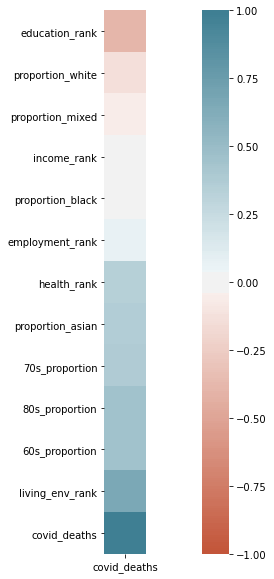

In [26]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(
    corr_deaths, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.show()


In [27]:
# living environment is the only factor that has a correlation above 0.5 and so lets see what pearson, spearman are for it
import scipy.stats as stats

corrPearson, pValPearson = stats.pearsonr(london_new.living_env_rank, london_new.covid_deaths)
corrSpearman, pValSpearman = stats.spearmanr(london_new.living_env_rank, london_new.covid_deaths)

print("Living Enviroment vs Total Deaths: Pearson = " + str(corrPearson) + ", Spearman = " + str(corrSpearman) + "," + str(pValSpearman))

Living Enviroment vs Total Deaths: Pearson = 0.6638662123612096, Spearman = 0.6567513368983958,3.3099177390752345e-05


In [28]:
# Now lets return to looking at cases over time but first we want to get cummulative covid deaths 
# as a proportion of population in the borough so we need to merge to get all ages numbers by borough and 
# then divide

london_pop_total = london_by_age.groupby(['Code', 'All ages']).mean().reset_index()
london_pop_total.drop(['Age'], axis=1, inplace=True)
london_pop_total.drop(['AgeTotal'], axis=1, inplace=True)
london_pop_total.rename(columns = {'All ages':'population'}, inplace = True)
london_pop_total

,Code,population
0,E09000001,5320.0
1,E09000002,105877.0
2,E09000003,196542.0
3,E09000004,120082.0
4,E09000005,168277.0
5,E09000006,160090.0
6,E09000007,135978.0
7,E09000008,187875.0
8,E09000009,172025.0
9,E09000010,163882.0


In [29]:
london_covid_over_time = pd.merge(london_covid_agg, london_pop_total, left_on='code', right_on='Code', how = 'inner')

london_covid_over_time.drop(['Code'], axis=1, inplace=True)
london_covid_over_time.rename(columns = {'count':'deaths'}, inplace = True)
london_covid_over_time.head()

,code,name,week,deaths,population
0,E09000001,City of London,1,0,5320.0
1,E09000001,City of London,2,0,5320.0
2,E09000001,City of London,3,0,5320.0
3,E09000001,City of London,4,0,5320.0
4,E09000001,City of London,5,0,5320.0


In [30]:
# get cummulative deaths per borough and then divide by population for the borough to get them as a proportion
london_covid_over_time['cummulative_deaths'] = london_covid_over_time.groupby('code')['deaths'].cumsum()
london_covid_over_time['cumulative_deaths_proportion'] = london_covid_over_time['cummulative_deaths']/london_covid_over_time['population']
london_covid_over_time['deaths_proportion'] = london_covid_over_time['deaths']/london_covid_over_time['population']


In [31]:
# calculate the mean deaths and cummulative deaths for each week and assign it to each df
weeks = london_covid_over_time['week'].unique()
london_covid_over_time['cumulative_deaths_mean'] = 0
london_covid_over_time['deaths_mean'] = 0

for this_week in weeks:
                        
        week_mean_cum = london_covid_over_time['cumulative_deaths_proportion'][london_covid_over_time.week == this_week].mean()
        week_mean = london_covid_over_time['deaths_proportion'][london_covid_over_time.week == this_week].mean()
        london_covid_over_time.loc[london_covid_over_time.week == this_week, "cumulative_deaths_mean"] = week_mean_cum
        london_covid_over_time.loc[london_covid_over_time.week == this_week, "deaths_mean"] = week_mean
        

In [32]:
# now calculate the delta from the mean
london_covid_over_time['cummulative_mean_delta'] = london_covid_over_time['cumulative_deaths_proportion'] - london_covid_over_time['cumulative_deaths_mean']
london_covid_over_time['death_mean_delta'] = london_covid_over_time['deaths_proportion'] - london_covid_over_time['deaths_mean']

In [33]:
london_covid_over_time.to_csv('deathcum.csv', index=False)

In [34]:
alt.data_transformers.disable_max_rows()

alt.Chart(london_covid_over_time).mark_line().encode(
    x='week:O',
    y='cummulative_mean_delta:Q',
    color='name',
    tooltip=['name']
).properties(
    width=800,
    height=500
).interactive()

alt.Chart(...)

In [35]:
alt.Chart(london_covid_over_time).mark_line().encode(
    x='week:O',
    y='death_mean_delta:Q',
    color='name',
    tooltip=['name']
).properties(
    width=800,
    height=500
).interactive()

alt.Chart(...)

In [36]:
# lets do a heatmap for same data but only for weeks 12-23. First create a new dataframe with just the fields I want
london_heat = london_covid_over_time[['name', 'week', 'cummulative_mean_delta', 'death_mean_delta']][((london_covid_over_time.week>11) & 
                                                                                (london_covid_over_time.week<23)) | 
                                                                                (london_covid_over_time.week>38)
                                                                                ].copy()

london_heat['week'] = pd.to_numeric(london_heat['week'])
london_heat.head()

,name,week,cummulative_mean_delta,death_mean_delta
11,City of London,12,-0.000009,-0.000009
12,City of London,13,0.000123,0.000132
13,City of London,14,-0.000126,-0.000248
14,City of London,15,-0.000081,0.000045
15,City of London,16,-0.000471,-0.000390


In [37]:
# now I want to widen the data frame so each week is in its own column

london_wide_cum = london_heat.pivot_table(index=['name'], 
                                    columns='week', values=['cummulative_mean_delta']).reset_index()


london_wide_cum.set_index("name", inplace = True)
london_wide_cum.head()

cummulative_mean_delta                                    \
week                                     12            13        14        15   
name                                                                            
Barking and Dagenham           9.592177e-06  8.190049e-07  0.000017 -0.000031   
Barnet                         8.782748e-07 -9.327767e-06  0.000215  0.000332   
Bexley                         7.357618e-06 -3.198488e-05 -0.000106 -0.000095   
Brent                          2.635783e-05  8.921170e-05  0.000197  0.000348   
Bromley                       -9.297667e-06 -3.406302e-05 -0.000008 -0.000089   

                                                                        \
week                        16        17        18        19        20   
name                                                                     
Barking and Dagenham -0.000081 -0.000206 -0.000195 -0.000205 -0.000208   
Barnet                0.000415  0.000462  0.000482  0.000499  0.000517   
Bexley               -0.000044 -0.000115 -0.000125 -0.000087 -0.000091   
Brent                 0.000664  0.000853  0.000971  0.001006  0.001035   
Bromley              -0.000123 -0.000015  0.000054  0.000121  0.000211   

                                ...                                          \
week                        21  ...        44        45        46        47   
name                            ...                                           
Barking and Dagenham -0.000251  ... -0.000231 -0.000194 -0.000099 -0.000031   
Barnet                0.000515  ...  0.000464  0.000454  0.000467  0.000467   
Bexley               -0.000068  ...  0.000170  0.000200  0.000214  0.000253   
Brent                 0.001029  ...  0.001077  0.001063  0.001047  0.001023   
Bromley               0.000227  ...  0.000312  0.000304  0.000301  0.000291   

                                                                        \
week                        48        49        50        51        52   
name                                                                     
Barking and Dagenham -0.000008  0.000067  0.000174  0.000219  0.000313   
Barnet                0.000475  0.000473  0.000479  0.000471  0.000456   
Bexley                0.000327  0.000379  0.000401  0.000434  0.000418   
Brent                 0.001010  0.000974  0.000995  0.000978  0.000995   
Bromley               0.000261  0.000231  0.000193  0.000184  0.000156   

                                
week                        53  
name                            
Barking and Dagenham  0.000425  
Barnet                0.000488  
Bexley                0.000461  
Brent                 0.000942  
Bromley               0.000131  

[5 rows x 26 columns]

In [38]:
london_wide_deaths = london_heat.pivot_table(index=['name'], 
                                    columns='week', values=['death_mean_delta']).reset_index()


london_wide_deaths.set_index("name", inplace = True)
london_wide_deaths.head()

death_mean_delta                                          \
week                               12        13        14        15        16   
name                                                                            
Barking and Dagenham     9.592177e-06 -0.000009  0.000016 -0.000048 -0.000050   
Barnet                   8.782748e-07 -0.000010  0.000225  0.000117  0.000083   
Bexley                   7.357618e-06 -0.000039 -0.000074  0.000010  0.000051   
Brent                    2.635783e-05  0.000063  0.000108  0.000150  0.000317   
Bromley                 -9.297667e-06 -0.000025  0.000026 -0.000081 -0.000034   

                                                                        ...  \
week                        17        18        19        20        21  ...   
name                                                                    ...   
Barking and Dagenham -0.000125  0.000012 -0.000010 -0.000003 -0.000043  ...   
Barnet                0.000047  0.000020  0.000017  0.000018 -0.000002  ...   
Bexley               -0.000071 -0.000010  0.000038 -0.000003  0.000022  ...   
Brent                 0.000189  0.000117  0.000035  0.000029 -0.000005  ...   
Bromley               0.000108  0.000069  0.000067  0.000090  0.000016  ...   

                                                                      \
week                            44        45        46            47   
name                                                                   
Barking and Dagenham  2.341100e-06  0.000037  0.000095  6.832911e-05   
Barnet               -6.372802e-06 -0.000010  0.000013  5.076200e-08   
Bexley                1.065412e-07  0.000030  0.000014  3.938375e-05   
Brent                -1.654874e-05 -0.000014 -0.000016 -2.367987e-05   
Bromley              -4.055772e-06 -0.000007 -0.000003 -1.057909e-05   

                                                                        \
week                        48        49        50        51        52   
name                                                                     
Barking and Dagenham  0.000023  0.000075  0.000107  0.000045  0.000095   
Barnet                0.000008 -0.000002  0.000006 -0.000008 -0.000015   
Bexley                0.000074  0.000052  0.000022  0.000033 -0.000016   
Brent                -0.000013 -0.000036  0.000021 -0.000017  0.000017   
Bromley              -0.000030 -0.000029 -0.000038 -0.000009 -0.000028   

                                
week                        53  
name                            
Barking and Dagenham  0.000111  
Barnet                0.000031  
Bexley                0.000044  
Brent                -0.000053  
Bromley              -0.000025  

[5 rows x 26 columns]

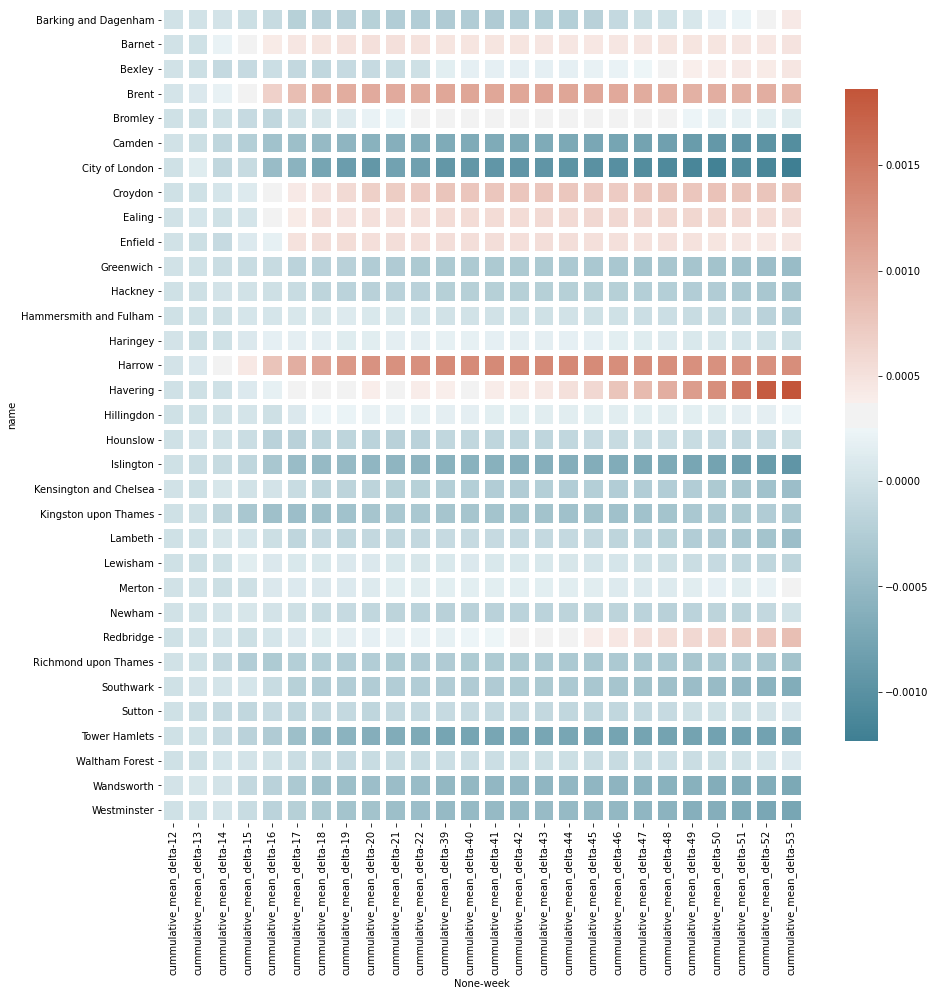

In [39]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(london_wide_cum, linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(london_wide_deaths, linewidths=5, cmap=cmap, 
           cbar_kws={"shrink": .8}, square=True)
plt.show()

In [ ]:
# I now want to turn into grids of 100 x 100 (but this time I want to do versus the weekly death data) so 
# I can create a facet grid heatmap

import folium  # Maps
from geopy.geocoders import Nominatim  # Address --> lat & long
from time import sleep  # Add in delays, which helps with API calls
import requests  # Get information from URLs

# Create a geolocator object

geolocator = Nominatim(user_agent="explorer")

# Function to get the location of a London borough

def get_london_location(name):
    sleep(1)
    loc = geolocator.geocode(f"Borough of {name}, London, UK", timeout=500)
    if loc == None:
        sleep(1)
        loc = geolocator.geocode(f"{name}, London, UK")
    print(name)
    return loc.latitude, loc.longitude

# Extract the lat and long for each location
unique_locations = london_covid_agg.name.unique()
unique_loc_df = pd.DataFrame(unique_locations, columns=['name'])

unique_loc_df = unique_loc_df["name"].apply(lambda name: get_london_location(name))

In [ ]:
london_covid_agg["latitude"], london_covid_agg["longitude"] = list(zip(*unique_loc_df))
london_covid_agg.head()